In [42]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

dev = qml.device("default.qubit", analytic=True, wires=num_qubits)

In [51]:
def layer(W):

    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.Rot(W[2, 0], W[2, 1], W[2, 2], wires=2)
    qml.Rot(W[3, 0], W[3, 1], W[3, 2], wires=3)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[3, 0])
    
def statepreparation(x):
    qml.BasisState(x, wires=[0, 1, 2, 3])

@qml.qnode(dev)
def circuit(weights, x=None):

    statepreparation(x)

    for W in weights:
        layer(W)
    return qml.expval(qml.PauliZ(0))

def variational_classifier(var, x=None):
    weights = var[0]
    bias = var[1]
    return circuit(weights, x=x) + bias

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss

def cost(var, X, Y):
    predictions = [variational_classifier(var, x=x) for x in X]
    return square_loss(Y, predictions)

In [47]:
num_qubits = 4
num_layers = 2
batch_size = 5


data = np.loadtxt("./parity.txt")
X = data[:, :-1]
Y = data[:, -1]
Y = Y * 2 - np.ones(len(Y))  # shift label from {0, 1} to {-1, 1}

var_init = (0.01 * np.random.randn(num_layers, num_qubits, 3), 0.0)
opt = NesterovMomentumOptimizer(0.5)

In [50]:
var = var_init
for it in range(25):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    var = opt.step(lambda v: cost(v, X_batch, Y_batch), var)

    # Compute accuracy
    predictions = [np.sign(variational_classifier(var, x=x)) for x in X]
    acc = accuracy(Y, predictions)

    print("Iter: {:5d} | Cost: {:0.7f} | Accuracy: {:0.7f} ".format(it + 1, cost(var, X, Y), acc))


Autograd ArrayBox with value 0.9979471722929864
Autograd ArrayBox with value -0.9979473683612898
Autograd ArrayBox with value 0.9979095432848555
Autograd ArrayBox with value -0.9979093472165521
Autograd ArrayBox with value -0.9979473683612898
0.9979840058822952
-0.9979841881948032
0.9980205499985627
-0.998020732339798
-0.9979841886960293
0.9979840063441927
-0.9980207317676872
0.9980205494764158
-0.998020528915275
0.9980207112277836
-0.9979840270079149
0.9979842093491499
0.9980207107091985
-0.998020528357362
0.9979842097968514
-0.99798402750558
0.9979840058822952
-0.9979841881948032
0.9980205499985627
-0.998020732339798
-0.9979841886960293
0.9979840063441927
-0.9980207317676872
0.9980205494764158
-0.998020528915275
0.9980207112277836
-0.9979840270079149
0.9979842093491499
0.9980207107091985
-0.998020528357362
0.9979842097968514
-0.99798402750558
Iter:     1 | Cost: 1.9960089 | Accuracy: 0.5000000 
Autograd ArrayBox with value 0.9929146510713887
Autograd ArrayBox with value 0.99291586650

-0.09053799371317453
-0.02623446351440445
-0.05858266757904429
-0.05879966704398592
-0.02698597224955463
-0.08981817651778286
-0.0588814573536789
-0.05843972153510207
0.08365675400782753
0.03311570321975141
0.06504063377806614
0.052341700844964235
0.03382889968394415
0.08297524908339321
0.05246180342561426
0.06485937546316642
-0.09053799371317453
-0.02623446351440445
-0.05858266757904429
-0.05879966704398592
-0.02698597224955463
-0.08981817651778286
-0.0588814573536789
-0.05843972153510207
0.08365675400782753
0.03311570321975141
0.06504063377806614
0.052341700844964235
0.03382889968394415
0.08297524908339321
0.05246180342561426
0.06485937546316642
Iter:    10 | Cost: 1.0037211 | Accuracy: 0.5000000 
Autograd ArrayBox with value 0.0397140062048203
Autograd ArrayBox with value 0.07416388659854489
Autograd ArrayBox with value 0.07416388659854489
Autograd ArrayBox with value -0.052663129602524165
Autograd ArrayBox with value -0.052663129602524165
-0.06019655462001958
0.03771595304175493
-0

-0.6295459387295222
0.6129923809087318
0.6098581783619779
-0.6316837510977864
0.6203669155341921
-0.6378331519129311
-0.639003060362298
0.6173724116229118
0.628868890203793
-0.6123153323830025
-0.6091302431524929
0.6309558158883013
-0.6196871315639617
0.6371533679427007
0.6382723897083121
-0.6166417409689257
-0.6295459387295222
0.6129923809087318
0.6098581783619779
-0.6316837510977864
0.6203669155341921
-0.6378331519129311
-0.639003060362298
0.6173724116229118
0.628868890203793
-0.6123153323830025
-0.6091302431524929
0.6309558158883013
-0.6196871315639617
0.6371533679427007
0.6382723897083121
-0.6166417409689257
Iter:    19 | Cost: 0.2099132 | Accuracy: 1.0000000 
Autograd ArrayBox with value 0.5992235863437402
Autograd ArrayBox with value -0.5436389472852987
Autograd ArrayBox with value -0.7637970811033701
Autograd ArrayBox with value 0.5516069775804439
Autograd ArrayBox with value -0.5436389472852987
-0.8221937592485585
0.7969114351964742
0.7825991918847317
-0.8228656002650107
0.8006

KeyboardInterrupt: 

In [57]:
def get_angles(x):

    beta0 = 2 * np.arcsin(np.sqrt(x[1] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1e-12))
    beta1 = 2 * np.arcsin(np.sqrt(x[3] ** 2) / np.sqrt(x[2] ** 2 + x[3] ** 2 + 1e-12))
    beta2 = 2 * np.arcsin(
        np.sqrt(x[2] ** 2 + x[3] ** 2) / np.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2 + x[3] ** 2)
    )

    return np.array([beta2, -beta1 / 2, beta1 / 2, -beta0 / 2, beta0 / 2])


def statepreparation(a):
    qml.RY(a[0], wires=0)

    qml.CNOT(wires=[0, 1])
    qml.RY(a[1], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[2], wires=1)

    qml.PauliX(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[3], wires=1)
    qml.CNOT(wires=[0, 1])
    qml.RY(a[4], wires=1)
    qml.PauliX(wires=0)
    
def layer(W):
    qml.Rot(W[0, 0], W[0, 1], W[0, 2], wires=0)
    qml.Rot(W[1, 0], W[1, 1], W[1, 2], wires=1)
    qml.CNOT(wires=[0, 1])
    
@qml.qnode(dev)
def circuit(weights, angles=None):
    statepreparation(angles)

    for W in weights:
        layer(W)

    return qml.expval(qml.PauliZ(0))


def variational_classifier(var, angles=None):
    weights = var[0]
    bias = var[1]
    return circuit(weights, angles=angles) + bias


def cost(weights, features, labels):
    predictions = [variational_classifier(weights, angles=f) for f in features]
    return square_loss(labels, predictions)

In [59]:
dev = qml.device("default.qubit", wires=2)
x = np.array([0.53896774, 0.79503606, 0.27826503, 0.0])
ang = get_angles(x)


@qml.qnode(dev)
def test(angles=None):

    statepreparation(angles)

    return qml.expval(qml.PauliZ(0))


test(angles=ang)

print("x               : ", x)
print("angles          : ", ang)
print("amplitude vector: ", np.real(dev._state))

x               :  [0.53896774 0.79503606 0.27826503 0.        ]
angles          :  [ 0.56397465 -0.          0.         -0.97504604  0.97504604]
amplitude vector:  [ 5.38967743e-01  7.95036065e-01  2.78265032e-01 -2.20431956e-17]


In [62]:
data = np.loadtxt("./iris_classes1and2_scaled.txt")
X = data[:, 0:2]
print("First X sample (original)  :", X[0])

# pad the vectors to size 2^2 with constant values
padding = 0.3 * np.ones((len(X), 1))
X_pad = np.c_[np.c_[X, padding], np.zeros((len(X), 1))]
print("First X sample (padded)    :", X_pad[0])

# normalize each input
normalization = np.sqrt(np.sum(X_pad ** 2, -1))
X_norm = (X_pad.T / normalization).T
print("First X sample (normalized):", X_norm[0])

# angles for state preparation are new features
features = np.array([get_angles(x) for x in X_norm])
print("First features sample      :", features[0])

Y = data[:, -1]

First X sample (original)  : [0.4  0.75]
First X sample (padded)    : [0.4  0.75 0.3  0.  ]
First X sample (normalized): [0.44376016 0.83205029 0.33282012 0.        ]
First features sample      : [ 0.67858523 -0.          0.         -1.080839    1.080839  ]


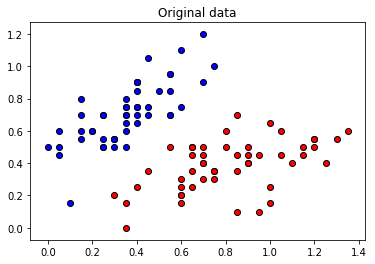

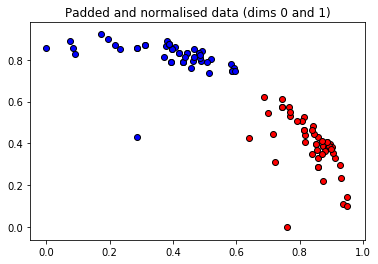

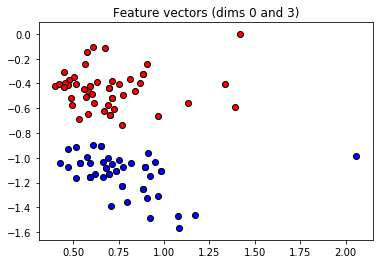

In [66]:
plt.figure()
plt.scatter(X[:, 0][Y == 1], X[:, 1][Y == 1], c="r", marker="o", edgecolors="k")
plt.scatter(X[:, 0][Y == -1], X[:, 1][Y == -1], c="b", marker="o", edgecolors="k")
plt.title("Original data")
plt.show()

plt.figure()
dim1 = 0
dim2 = 1
plt.scatter(X_norm[:, dim1][Y == 1], X_norm[:, dim2][Y == 1], c="r", marker="o", edgecolors="k")
plt.scatter(X_norm[:, dim1][Y == -1], X_norm[:, dim2][Y == -1], c="b", marker="o", edgecolors="k")
plt.title("Padded and normalised data (dims {} and {})".format(dim1, dim2))
plt.show()

plt.figure()
dim1 = 0
dim2 = 3
plt.scatter(features[:, dim1][Y == 1], features[:, dim2][Y == 1], c="r", marker="o", edgecolors="k")
plt.scatter(
    features[:, dim1][Y == -1], features[:, dim2][Y == -1], c="b", marker="o", edgecolors="k"
)
plt.title("Feature vectors (dims {} and {})".format(dim1, dim2))
plt.show()


In [68]:
np.random.seed(0)
num_data = len(Y)
num_train = int(0.75 * num_data)
index = np.random.permutation(range(num_data))
feats_train = features[index[:num_train]]
Y_train = Y[index[:num_train]]
feats_val = features[index[num_train:]]
Y_val = Y[index[num_train:]]

# We need these later for plotting
X_train = X[index[:num_train]]
X_val = X[index[num_train:]]

In [70]:
num_qubits = 2
num_layers = 6
var_init = (0.01 * np.random.randn(num_layers, num_qubits, 3), 0.0)

In [72]:
opt = NesterovMomentumOptimizer(0.01)
batch_size = 5

# train the variational classifier
var = var_init
for it in range(60):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, num_train, (batch_size,))
    feats_train_batch = feats_train[batch_index]
    Y_train_batch = Y_train[batch_index]
    var = opt.step(lambda v: cost(v, feats_train_batch, Y_train_batch), var)

    # Compute predictions on train and validation set
    predictions_train = [np.sign(variational_classifier(var, angles=f)) for f in feats_train]
    predictions_val = [np.sign(variational_classifier(var, angles=f)) for f in feats_val]

    # Compute accuracy on train and validation set
    acc_train = accuracy(Y_train, predictions_train)
    acc_val = accuracy(Y_val, predictions_val)

    print(
        "Iter: {:5d} | Cost: {:0.7f} | Acc train: {:0.7f} | Acc validation: {:0.7f} "
        "".format(it + 1, cost(var, features, Y), acc_train, acc_val)
    )

Iter:     1 | Cost: 1.4395800 | Acc train: 0.4933333 | Acc validation: 0.5600000 
Iter:     2 | Cost: 1.3322535 | Acc train: 0.4933333 | Acc validation: 0.5600000 
Iter:     3 | Cost: 1.2154539 | Acc train: 0.4800000 | Acc validation: 0.5600000 
Iter:     4 | Cost: 1.0776852 | Acc train: 0.4666667 | Acc validation: 0.5600000 
Iter:     5 | Cost: 0.9647130 | Acc train: 0.4933333 | Acc validation: 0.6000000 
Iter:     6 | Cost: 0.8759513 | Acc train: 0.6000000 | Acc validation: 0.7600000 
Iter:     7 | Cost: 0.8475651 | Acc train: 0.7066667 | Acc validation: 0.7600000 
Iter:     8 | Cost: 0.9067782 | Acc train: 0.5866667 | Acc validation: 0.5200000 
Iter:     9 | Cost: 0.9720204 | Acc train: 0.5200000 | Acc validation: 0.4400000 
Iter:    10 | Cost: 1.0161827 | Acc train: 0.5200000 | Acc validation: 0.4400000 
Iter:    11 | Cost: 1.0642731 | Acc train: 0.5200000 | Acc validation: 0.4400000 
Iter:    12 | Cost: 1.0783566 | Acc train: 0.5200000 | Acc validation: 0.4400000 
Iter:    13 | Co

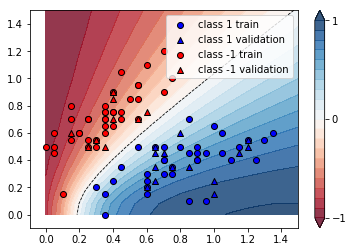

In [73]:
plt.figure()
cm = plt.cm.RdBu

# make data for decision regions
xx, yy = np.meshgrid(np.linspace(0.0, 1.5, 20), np.linspace(0.0, 1.5, 20))
X_grid = [np.array([x, y]) for x, y in zip(xx.flatten(), yy.flatten())]

# preprocess grid points like data inputs above
padding = 0.3 * np.ones((len(X_grid), 1))
X_grid = np.c_[np.c_[X_grid, padding], np.zeros((len(X_grid), 1))]  # pad each input
normalization = np.sqrt(np.sum(X_grid ** 2, -1))
X_grid = (X_grid.T / normalization).T  # normalize each input
features_grid = np.array(
    [get_angles(x) for x in X_grid]
)  # angles for state preparation are new features
predictions_grid = [variational_classifier(var, angles=f) for f in features_grid]
Z = np.reshape(predictions_grid, xx.shape)

# plot decision regions
cnt = plt.contourf(xx, yy, Z, levels=np.arange(-1, 1.1, 0.1), cmap=cm, alpha=0.8, extend="both")
plt.contour(xx, yy, Z, levels=[0.0], colors=("black",), linestyles=("--",), linewidths=(0.8,))
plt.colorbar(cnt, ticks=[-1, 0, 1])

# plot data
plt.scatter(
    X_train[:, 0][Y_train == 1],
    X_train[:, 1][Y_train == 1],
    c="b",
    marker="o",
    edgecolors="k",
    label="class 1 train",
)
plt.scatter(
    X_val[:, 0][Y_val == 1],
    X_val[:, 1][Y_val == 1],
    c="b",
    marker="^",
    edgecolors="k",
    label="class 1 validation",
)
plt.scatter(
    X_train[:, 0][Y_train == -1],
    X_train[:, 1][Y_train == -1],
    c="r",
    marker="o",
    edgecolors="k",
    label="class -1 train",
)
plt.scatter(
    X_val[:, 0][Y_val == -1],
    X_val[:, 1][Y_val == -1],
    c="r",
    marker="^",
    edgecolors="k",
    label="class -1 validation",
)

plt.legend()
plt.show()